# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [2]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [3]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [4]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
adver_data.shape

(200, 4)

In [6]:
import seaborn as sns;
import matplotlib.pyplot as plt

sns.pairplot(adver_data)
plt.show()

<Figure size 1000x1000 with 20 Axes>

In [7]:
adver_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [8]:
import numpy as np

X = np.array([adver_data["TV"].values,adver_data["Radio"].values,adver_data["Newspaper"].values]).transpose()
y = adver_data["Sales"].values
print(X)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [9]:
means = np.mean(X, axis = 0)

stds = np.std(X, axis = 0)
print(means)
print(stds)

[147.0425  23.264   30.554 ]
[85.63933176 14.80964564 21.72410606]


In [10]:
for i in range(200):
    for j in range(3):
        X[i][j] = (X[i][j]-float(means[j]))/stds[j]
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [11]:
#for c in adver_data.columns: #итерируемся по всем признакам, включая Sales
#    mean, std = adver_data[c].mean(), adver_data[c].std() #mean и std
#    adver_data[c]=(adver_data[c] - mean)/std #нормируем данные
#adver_data.head()

In [12]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#pd.DataFrame(scaler.fit_transform(adver_data), columns=['TV', 'Radio', 'Newspaper', 'Sales']).head()


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [13]:
import numpy as np

ones =  np.ones(200)
X = np.c_[ ones, X ]
print(X)

[[ 1.00000000e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [ 1.00000000e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [ 1.00000000e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 1.00000000e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 1.00000000e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [ 1.00000000e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [ 1.00000000e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [ 1.00000000e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [ 1.00000000e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 1.00000000e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [ 1.00000000e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 1.00000000e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [ 1.00000000e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [ 1.00000000e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 1.00000000e+00  6.66253447e-01  6.50657027e-01  7.11007392e

In [14]:
#adver_data.insert(0, 'ones', '1')
#adver_data.head()

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [15]:
def mserror(y, y_pred):
    return np.mean((y-y_pred)**2)

In [16]:
#встроенная функция
from sklearn.metrics import mean_squared_error

print(mean_squared_error(np.array([1, 2, 3]), np.array([0.99, 1.99, 2.99])))

9.99999999999987e-05


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [17]:
med = np.array([adver_data.Sales.quantile(q=0.50)]*200)
answer1 = mserror(y,med)
print(answer1)
write_answer_to_file(28.34575, '1.txt')

28.34575


In [18]:
print(mean_squared_error(y, med))

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [19]:
def normal_equation(X, y):
    a = np.dot(X.T, X) 
    b = np.dot(X.T, y) 
    res = np.linalg.solve(a, b) 
    return res

In [20]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [21]:
w = np.array(norm_eq_weights)
Y = np.array([0,0,0,1]).T
answer2 = np.dot(Y, w)
print(answer2)
write_answer_to_file(14.0225, '2.txt')

-0.02253860888873151


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [23]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [25]:
#answer3 = mserror(y, linear_prediction(adver_data[['TV', 'Radio', 'Newspaper', 'ones']].values, norm_eq_weights  ))
#print(answer3)
write_answer_to_file(
2.78412631451, '3.txt')

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [214]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   # всего обьектов (нормировка)
    x = X[train_ind]                 # текуший случайный k обьект 
    y_pred = linear_prediction(x, w) # предсказание для к случайного обьекта 
    rs = (y_pred - y[train_ind])     # регрессионый остаток для k обьекта 
    
    grad0 = 2.0/N*x[0]*rs
    grad1 = 2.0/N*x[1]*rs
    grad2 = 2.0/N*x[2]*rs
    grad3 = 2.0/N*x[3]*rs
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [215]:
#проще
def stochastic_gradient_step_v(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   
    x = X[train_ind]                 
    y_pred = linear_prediction(x, w) 
    rs = (y_pred - y[train_ind])     
    return  w - 2.0* eta/N*x*rs

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [216]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        # Обновляем веса
        new_w = stochastic_gradient_step_v(X, y, w, random_ind, eta)
        
        # Считаем ошибку
        error = mserror(y, linear_prediction(X, new_w))
        errors.append(error)
        
        weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num += 1            
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [217]:
FeatureMatrix = adver_data[['TV', 'Radio', 'Newspaper', 'ones']].values
TargetMatrix = y

In [218]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(FeatureMatrix, TargetMatrix, [0,0,0,0],max_iter=1e5)             
print(stoch_grad_desc_weights)


[ 7.58779947e-01  5.31826373e-01 -8.69690679e-03 -4.31201411e-04]
CPU times: user 4.01 s, sys: 65.3 ms, total: 4.08 s
Wall time: 4.57 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


/Users/mr.ugnivenko/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std', 'mean', 'ones']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'MSE')

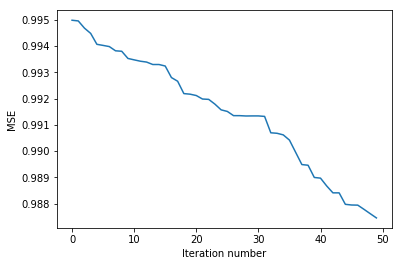

In [219]:
%pylab inline
stoch_errors_by_iter = stochastic_gradient_descent(FeatureMatrix, TargetMatrix, [0,0,0,0],max_iter=1e5)[1]
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

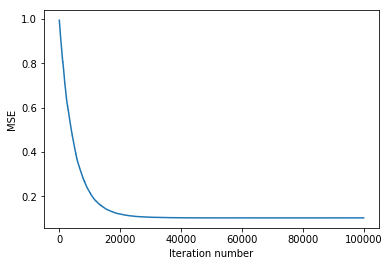

In [220]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [221]:
stoch_grad_desc_weights = stochastic_gradient_descent(FeatureMatrix, TargetMatrix, [0,0,0,0],max_iter=1e5)[0]
print(stoch_grad_desc_weights)

[ 7.58779947e-01  5.31826373e-01 -8.69690679e-03 -4.31201411e-04]


**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [222]:
stoch_errors_by_iter[-1]

0.10235722781159813

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [26]:
#answer4 = mserror(y, linear_prediction(adver_data[['TV', 'Radio', 'Newspaper', 'ones']].values, stoch_grad_desc_weights))
#print(answer4)
write_answer_to_file(
2.78441258841, '4.txt')

**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**

## Правильное решение!

In [ ]:
https://github.com/johnkorn/ml-spec/blob/master/02-supervised-learning/.ipynb_checkpoints/PA_linreg_stochastic_grad_descent-checkpoint.ipynb